In [47]:
# standard data manipulation
import pandas as pd

# geospatial data manipulation/visualization
import geopandas as gpd

# advanced graph visualization
import seaborn as sns
import matplotlib.pyplot as plt

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [48]:
df_arrest = pd.read_csv('data/Arrest_Data_from_2020_to_Present.csv')

In [49]:
df_arrest.head()

,Report ID,Report Type,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Disposition Description,Address,Cross Street,LAT,LON,Location,Booking Date,Booking Time,Booking Location,Booking Location Code
0,211517634,RFC,11/16/2021 12:00:00 AM,830.0,15,N Hollywood,1535,57,M,W,NaN,NaN,I,63.44(B),NaN,MISDEMEANOR COMPLAINT FILED,LANKERSHIM,CALIFA,34.1775,-118.3822,POINT (-118.3822 34.1775),NaN,NaN,NaN,NaN
1,211218835,RFC,09/01/2021 12:00:00 AM,1230.0,12,77th Street,1207,22,M,H,NaN,NaN,M,104.15)B)(2,NaN,MISDEMEANOR COMPLAINT FILED,4700 S VERMONT AV,NaN,33.9996,-118.2915,POINT (-118.2915 33.9996),NaN,NaN,NaN,NaN
2,221507152,RFC,03/17/2022 12:00:00 AM,850.0,15,N Hollywood,1511,35,M,H,NaN,NaN,M,369(I)PC,NaN,MISDEMEANOR COMPLAINT FILED,FULTON,VARNA,34.2037,-118.4210,POINT (-118.421 34.2037),NaN,NaN,NaN,NaN
3,211611663,RFC,09/20/2021 12:00:00 AM,1735.0,16,Foothill,1675,24,M,H,NaN,NaN,M,104.15B2LAM,NaN,MISDEMEANOR COMPLAINT FILED,8800 SUNLAND BL,NaN,0.0000,0.0000,POINT (0 0),NaN,NaN,NaN,NaN
4,211911576,RFC,07/27/2021 12:00:00 AM,850.0,19,Mission,1961,51,F,H,NaN,NaN,I,41.24(A)LAM,NaN,MISDEMEANOR COMPLAINT FILED,9400 N SEPULVEDA BL,NaN,34.2388,-118.4677,POINT (-118.4677 34.2388),NaN,NaN,NaN,NaN


In [50]:
df_arrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198736 entries, 0 to 198735
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Report ID                 198736 non-null  int64  
 1   Report Type               198736 non-null  object 
 2   Arrest Date               198736 non-null  object 
 3   Time                      198724 non-null  float64
 4   Area ID                   198736 non-null  int64  
 5   Area Name                 198736 non-null  object 
 6   Reporting District        198736 non-null  int64  
 7   Age                       198736 non-null  int64  
 8   Sex Code                  198736 non-null  object 
 9   Descent Code              198736 non-null  object 
 10  Charge Group Code         182953 non-null  float64
 11  Charge Group Description  182922 non-null  object 
 12  Arrest Type Code          198735 non-null  object 
 13  Charge                    198736 non-null  o

In [51]:
df_arrest = df_arrest[df_arrest['Charge Description'].notna()]

In [52]:
df_arrest['Charge Group Description'].value_counts()

Miscellaneous Other Violations    27262
Aggravated Assault                25535
Driving Under Influence           18225
Other Assaults                    18117
Narcotic Drug Laws                17189
Weapon (carry/poss)               13301
Vehicle Theft                     10730
Prostitution/Allied                7274
Robbery                            6259
Larceny                            6123
Burglary                           5537
Moving Traffic Violations          5083
Liquor Laws                        4735
Drunkeness                         4166
Against Family/Child               2524
Sex (except rape/prst)             1786
Fraud/Embezzlement                 1729
Gambling                           1614
Disorderly Conduct                 1515
Receive Stolen Property            1200
Homicide                            874
Rape                                743
Non-Criminal Detention              632
Forgery/Counterfeit                 544
Disturbing the Peace                125


In [114]:
pd.set_option('display.max_columns', 500)
df_arrest[df_arrest['Charge Group Description'] == 'Miscellaneous Other Violations'].value_counts('Charge Description')                          

Charge Description
VANDALISM W/LOSS VALUED EQ OR > $400          3026
PAROLE WARRANT                                2146
WARRANT-PETITION TO REVOKE COMMUNITY SUPVN    1981
REFUSE TO LEAVE PROPERTY UPON REQST OWNER     1385
VIOL DOMESTIC VIOL PROTECT/STAY AWAY ORD      1197
LOS ANGELES MUNICIPAL CODE                     997
REFUSE TO LEAVE PROPERTY UPON REQUEST P.O.     964
DEFACE PROPERTY                                893
PARK REGULATIONS                               866
VANDALISM                                      859
VIOLATION OF PAROLE:FELONY                     799
FUGITIVE FROM JUSTICE WARRANTLESS ARR          553
TRESPASSING LANDS UNDER CULTIVATION            527
DEFACE/DAMAGE PROPERTY <$400                   515
DAMAGE PROPERTY                                511
PROBATION VIOLATION                            470
VIOLATION OF PAROLE                            455
PETITION TO REVOKE PRCS                        420
ARSON OF PROPERTY                              361
UNAUTHORIZED

In [66]:
df_arrest_property = df_arrest[(df_arrest['Charge Description'] == 'REFUSE TO LEAVE PROPERTY UPON REQUEST P.O.') | 
                               (df_arrest['Charge Description'] == 'REFUSE TO LEAVE PROPERTY UPON REQST OWNER') | 
                               (df_arrest['Charge Description'] == 'TRESPASSING LANDS UNDER CULTIVATION')]

In [67]:
df_arrest_property.shape

(2876, 25)

In [71]:
# lets visualize the dataframe spatially by converting it to a geodataframe
gdf_arrest_property = gpd.GeoDataFrame(df_arrest_property, 
                       geometry=gpd.points_from_xy(df_arrest_property['LON'], df_arrest_property['LAT']))

<AxesSubplot: >

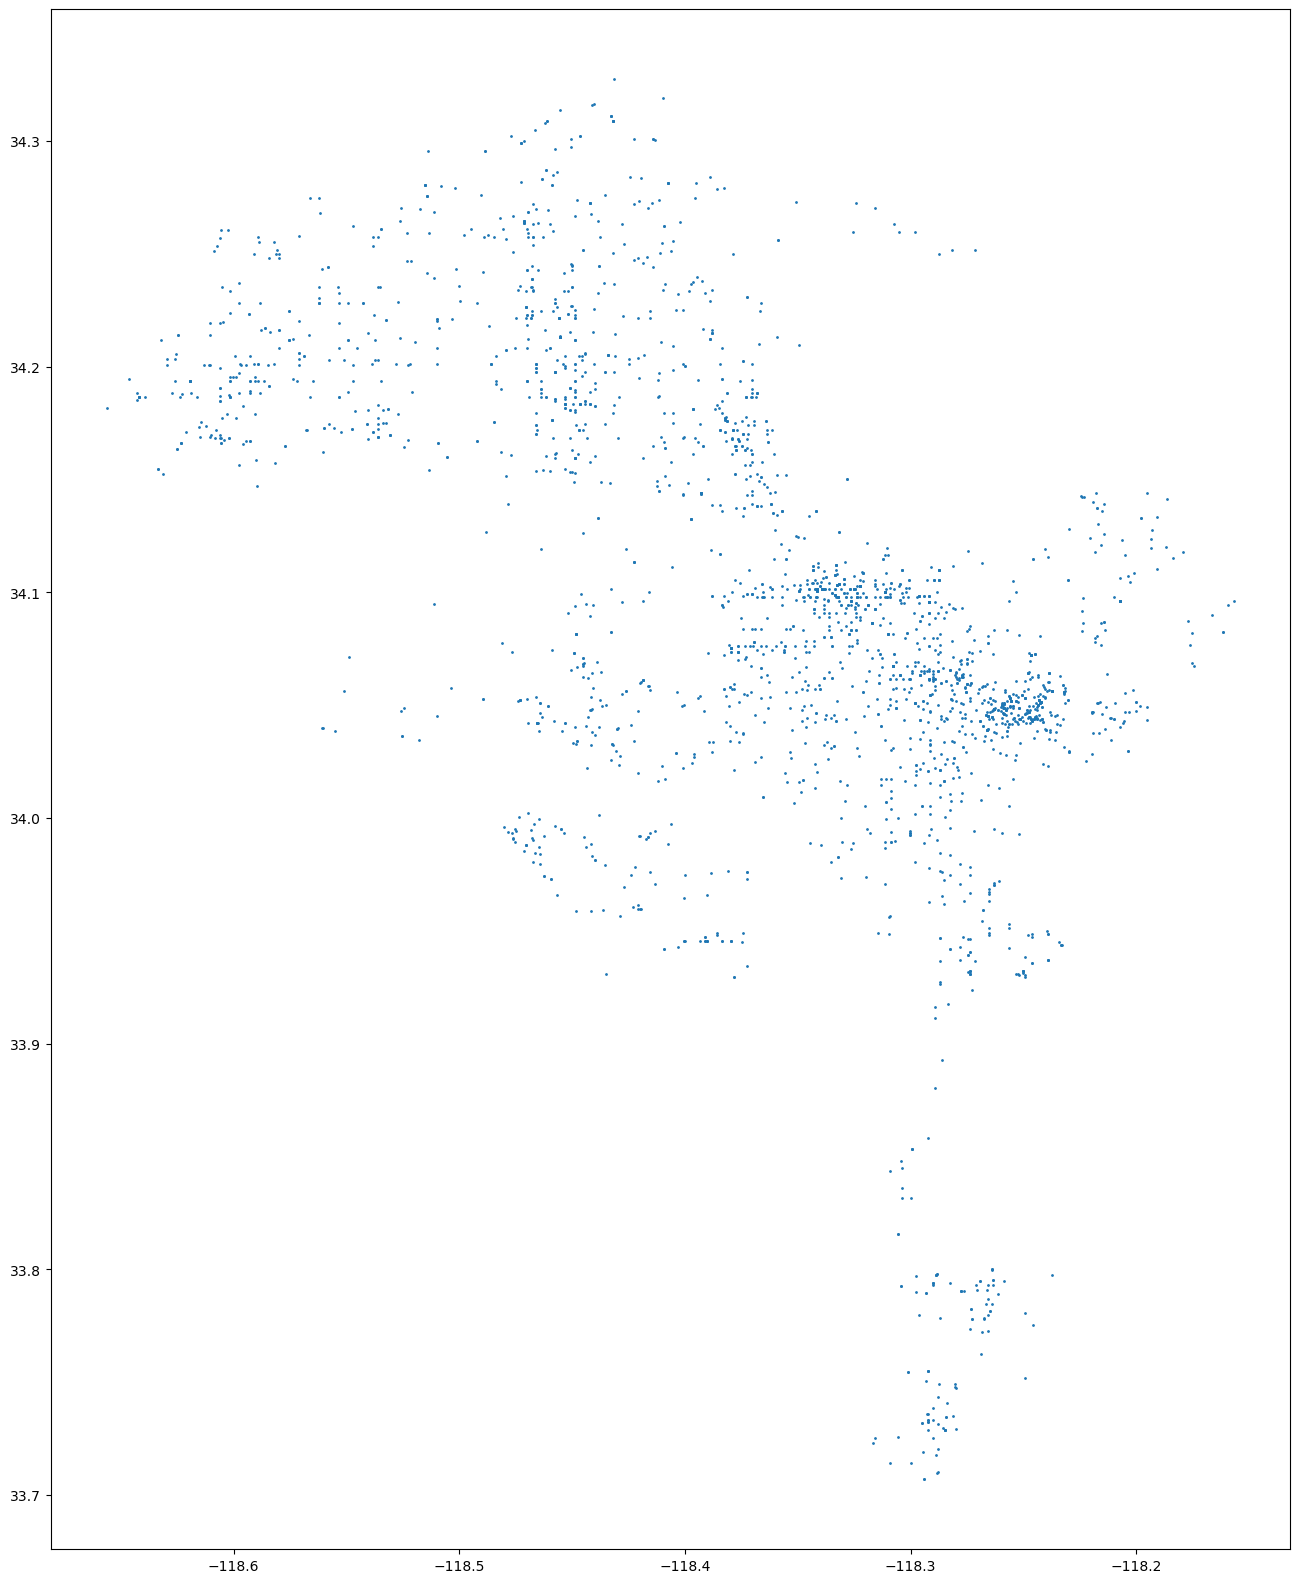

In [72]:
gdf_arrest_property = gdf_arrest_property[gdf_arrest_property['LON'] != 0]
gdf_arrest_property.plot(figsize = (20,20), markersize = 1)

In [73]:
# re-import rent burden csv file but this time with Geo_FIPS as a string
df = pd.read_csv('data/rent_burden_ct_1.csv', dtype = {'Geo_FIPS':str})
# fips column does not have a leading zero, let's add that here
df['Geo_FIPS'] = df['Geo_FIPS'].str.zfill(11)
# import census tract spatial data
tracts=gpd.read_file('data/Census_Tracts_2020.geojson')
# create FIPS column
tracts['fips'] ='06' + '037' + tracts['CT20']
tracts = tracts[['geometry','fips']]
# rename column
df = df.rename({'Geo_FIPS': 'fips'}, axis=1)
# create a new dataframe based on the join
df_tracts=tracts.merge(df,on="fips")

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [75]:
df_tracts

,geometry,fips,total_housing_units,white_alone,black_alone,american_indian_alone,asian_alone,native_hawaiian_alone,other,two_or_more,white_alone_not_hisp,hispanic,total_pop,rent_burden
0,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,644,438,0,0,58,0,52,96,372,207,3879,0.549689
1,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,344,287,0,0,0,0,33,24,287,33,4247,0.706395
2,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,762,450,8,16,48,0,110,130,394,285,3583,0.535433
3,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,1140,815,68,0,25,0,178,54,747,269,3723,0.663158
4,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,816,715,17,0,28,17,28,11,515,239,2690,0.651961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,"POLYGON ((-117.98268 34.04469, -117.98287 34.0...",06037980035,110,39,0,0,6,0,65,0,23,81,629,0.354545
2491,"POLYGON ((-118.07027 34.05725, -118.07073 34.0...",06037980036,55,0,16,0,0,0,39,0,0,55,515,0.709091
2492,"POLYGON ((-118.28411 33.80773, -118.28447 33.8...",06037980037,0,0,0,0,0,0,0,0,0,0,0,0.000000
2493,"POLYGON ((-118.36674 34.01539, -118.36673 34.0...",06037980038,0,0,0,0,0,0,0,0,0,0,0,0.000000


In [86]:
df_neighborhoods

,Report ID,Report Type,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Disposition Description,Address,Cross Street,LAT,LON,Location,Booking Date,Booking Time,Booking Location,Booking Location Code,geometry,index_right,fips,total_housing_units,white_alone,black_alone,american_indian_alone,asian_alone,native_hawaiian_alone,other,two_or_more,white_alone_not_hisp,hispanic,total_pop,rent_burden
223,6128091,BOOKING,02/18/2021 12:00:00 AM,730.0,2,Rampart,285,32,M,H,24.0,Miscellaneous Other Violations,M,602(O)(2)PC,REFUSE TO LEAVE PROPERTY UPON REQST OWNER,MISDEMEANOR COMPLAINT FILED,1900 W PICO BL,NaN,34.0472,-118.2782,POINT (-118.2782 34.0472),02/18/2021 12:00:00 AM,928.0,METRO - JAIL DIVISION,4273.0,POINT (-118.27820 34.04720),637,06037209820,679,207,25,0,28,0,385,34,29,603,2741,0.539028
420,6224080,BOOKING,08/01/2021 12:00:00 AM,455.0,14,Pacific,1499,23,F,H,24.0,Miscellaneous Other Violations,M,602(O)(1)PC,REFUSE TO LEAVE PROPERTY UPON REQUEST P.O.,MISDEMEANOR COMPLAINT FILED,11500 AVIATION BL,NaN,33.9298,-118.3784,POINT (-118.3784 33.9298),08/01/2021 12:00:00 AM,607.0,PACIFIC,4214.0,POINT (-118.37840 33.92980),2485,06037980028,0,0,0,0,0,0,0,0,0,0,0,0.000000
16019,6237044,BOOKING,08/25/2021 12:00:00 AM,1335.0,14,Pacific,1496,50,F,B,24.0,Miscellaneous Other Violations,M,602(O)(1)PC,REFUSE TO LEAVE PROPERTY UPON REQUEST P.O.,MISDEMEANOR COMPLAINT FILED,6500 W CENTURY BL,NaN,33.9456,-118.3932,POINT (-118.3932 33.9456),08/25/2021 12:00:00 AM,1518.0,PACIFIC,4214.0,POINT (-118.39320 33.94560),2485,06037980028,0,0,0,0,0,0,0,0,0,0,0,0.000000
16937,6257845,BOOKING,10/04/2021 12:00:00 AM,2120.0,14,Pacific,1497,18,F,H,24.0,Miscellaneous Other Violations,M,602(O)(1)PC,REFUSE TO LEAVE PROPERTY UPON REQUEST P.O.,MISDEMEANOR COMPLAINT FILED,5400 W CENTURY BL,NaN,33.9453,-118.3747,POINT (-118.3747 33.9453),10/04/2021 12:00:00 AM,2301.0,PACIFIC,4214.0,POINT (-118.37470 33.94530),2485,06037980028,0,0,0,0,0,0,0,0,0,0,0,0.000000
18131,6248657,BOOKING,09/16/2021 12:00:00 AM,1120.0,14,Pacific,1496,41,M,W,24.0,Miscellaneous Other Violations,M,602(O)(2)PC,REFUSE TO LEAVE PROPERTY UPON REQST OWNER,MISDEMEANOR COMPLAINT FILED,6100 W CENTURY BL,NaN,33.9456,-118.3904,POINT (-118.3904 33.9456),09/16/2021 12:00:00 AM,1339.0,PACIFIC,4214.0,POINT (-118.39040 33.94560),2485,06037980028,0,0,0,0,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197345,6537305,BOOKING,01/18/2023 12:00:00 AM,2320.0,12,77th Street,1251,32,M,B,24.0,Miscellaneous Other Violations,M,602(O)(2)PC,REFUSE TO LEAVE PROPERTY UPON REQST OWNER,MISDEMEANOR COMPLAINT FILED,7300 CRENSHAW BL,NaN,33.9736,-118.3309,POINT (-118.3309 33.9736),01/19/2023 12:00:00 AM,428.0,77TH ST,4212.0,POINT (-118.33090 33.97360),839,06037235202,1197,84,924,0,0,0,101,88,16,287,3945,0.697577
197515,6535435,BOOKING,01/15/2023 12:00:00 AM,1545.0,19,Mission,1959,44,F,H,24.0,Miscellaneous Other Violations,M,602(O)(2)PC,REFUSE TO LEAVE PROPERTY UPON REQST OWNER,MISDEMEANOR COMPLAINT FILED,9900 BARTEE AV,NaN,34.2503,-118.4319,POINT (-118.4319 34.2503),01/15/2023 12:00:00 AM,1822.0,VALLEY - JAIL DIV,4279.0,POINT (-118.43190 34.25030),142,06037119003,164,87,21,0,14,0,23,19,0,143,4070,0.335366
197649,6537215,BOOKING,01/18/2023 12:00:00 AM,2050.0,7,Wilshire,762,38,F,B,24.0,Miscellaneous Other Violations,M,602(O)(2)PC,REFUSE TO LEAVE PROPERTY UPON REQST OWNER,MISDEMEANOR COMPLAINT FILED,1700 S HAYWORTH AV,NaN,34.0458,-118.3691,POINT (-118.3691 34.0458),01/19/2023 12:00:00 AM,14.0,METRO - JAIL DIVISION,4273.0,POINT (-118.36910 34.04580),708,06037216700,960,357,320,19,53,0,86,125,257,231,3322,0.411458
197939,6537998,BOOKING,01/20/2023 12:00:00 AM,200.0,2,Rampart,248,27,M,O,24.0,Miscellaneous Other Violations,M,602(O)(2)PC,REFUSE TO LEAVE PROPERTY UPON REQST OWNER,MISDEMEANOR COMPLAI

In [94]:
# spatial join to place census tracts into a neighborhood 
df = gpd.sjoin(gdf_arrest_property, df_tracts)

<AxesSubplot: >

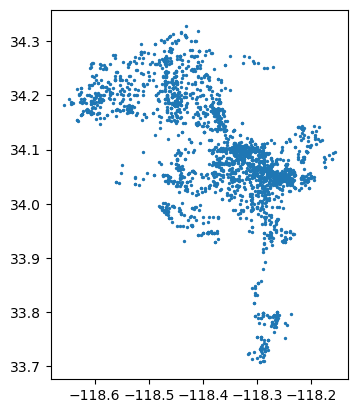

In [95]:
df.plot(markersize=2)

In [88]:
import plotly.express as px

In [102]:
?update_layout

Object `update_layout` not found.


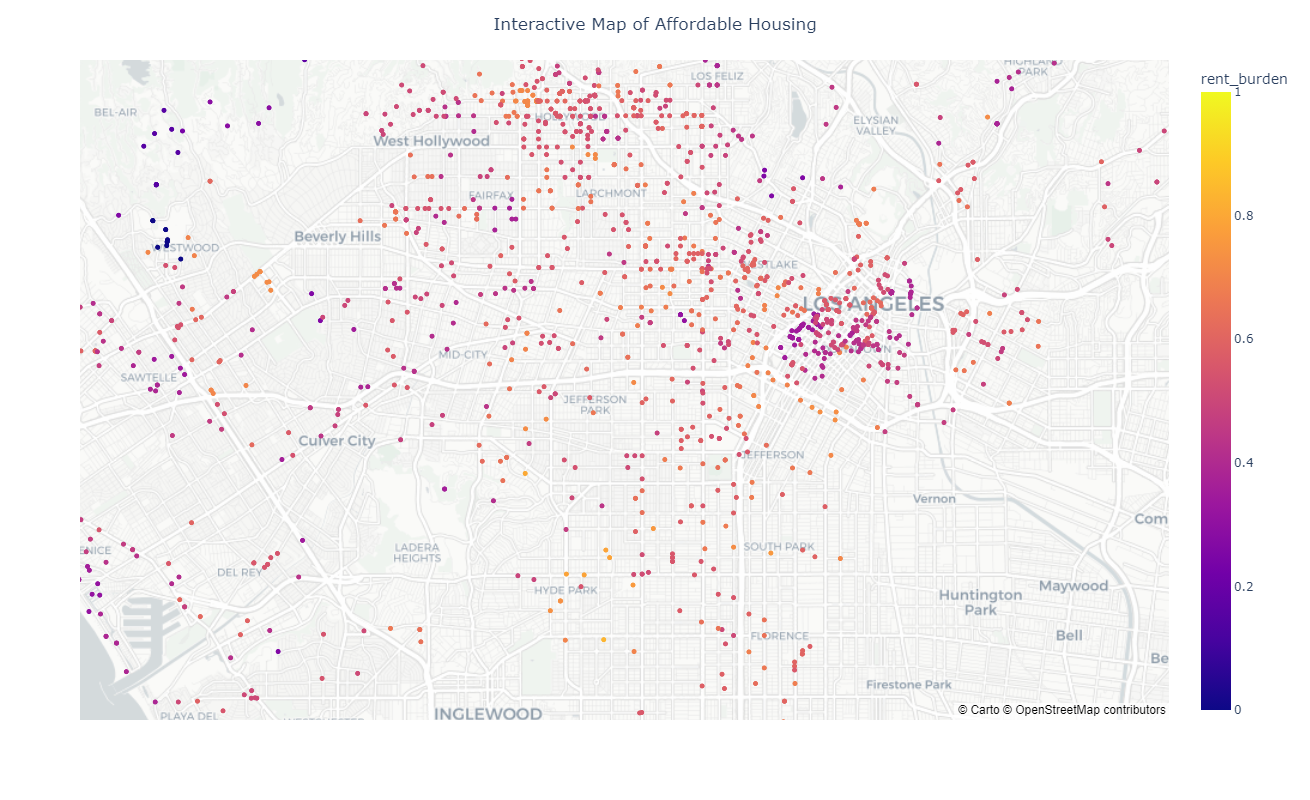

In [108]:
# plot using plotly.express with color indicating housing type and size indicating funding amount
fig = px.scatter_mapbox(df,
                        lat='LAT',
                        lon='LON',
                        mapbox_style="carto-positron",
                        color = 'rent_burden')

# options on the layout
fig.update_layout(
    width = 1200,
    height = 800,
    title = "Interactive Map of Affordable Housing",
    title_x=0.5, # aligns title to center
) 

fig.show()


In [92]:
# create function that creates assesses the renter population by race then assigns that row with one of the major race categories
def categorise_race_tracts(row):  
    if row['black_alone'] > row['white_alone'] and row['black_alone'] > row['hispanic'] and row['black_alone'] > row['other'] and row['black_alone'] > row['asian_alone']:
        return 'Black'
    elif row['hispanic'] > row['white_alone'] and row['hispanic'] > row['black_alone'] and row['hispanic'] > row['other'] and row['hispanic'] > row['asian_alone']:
        return 'Hispanic'
    elif row['white_alone'] > row['hispanic'] and row['white_alone'] > row['black_alone'] and row['white_alone'] > row['other'] and row['white_alone'] > row['asian_alone']:
        return 'White'
    elif row['asian_alone'] > row['hispanic'] and row['asian_alone'] > row['black_alone'] and row['asian_alone'] > row['other'] and row['black_alone'] > row['white_alone']:
        return 'Asian'
    return 'Other'

In [93]:
# iterate on dataframe and create new column by applying created race function
df_tracts['majority_race'] = df_tracts.apply(lambda row: categorise_race_tracts(row), axis=1)
# assess results
df_tracts.value_counts('majority_race')

majority_race
Hispanic    1145
White       1008
Other        209
Black        119
Asian         14
dtype: int64